## Qualitative Examples of Machine Learning Applications

### Classification: Predicting discrete labels

We will first take a look at a simple *classification* task, in which you are given a set of labeled points and want to use these to classify some unlabeled points.

Imagine that we have the data shown in this figure:

![](images/./classification-1.png)

Task description:
* Two features (x, y)
* One class label (by color)
* Goal: creating a model that decides whether a new point should be "red" or "blue"

Model constraint:
* We want to use a simple model: a straight seperating the data
* The location of the line is to be learned from the data

There are numerous models that can succeed. Are they all equally good?

### The optimal solution
![](images/classification-2.png)

Now, image we obtain new data on which we want to predict the labels.

![](images/classification-3.png)

We can use our trained model to do that:

# ![](images/classification-4.png)

This looks trivial. The separation can easily be done by a look at the data. Why do we have to employ an algorithm?


This is similar to the task of automated spam detection for email; in this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ normalized counts of important words or phrases ("Viagra", "Nigerian prince", etc.)
- *label* $\to$ "spam" or "not spam"



### Regression: Predicting continuous labels

We will next look at a *regression* task in which the labels are continuous quantities.

Consider the data shown in the following figure, which consists of a set of points each with a continuous label:

![](images/regression-1.png)

As with the classification example, we have two-dimensional data: that is, there are two features describing each data point. The color of each point represents the continuous label for that point.

we will use a simple linear regression model assumes that if we treat the label as a third spatial dimension, we can fit a plane to the data.

This is a generalization of fitting a line to data with two coordinates.

We can visualize this setup as shown in the following figure:

![](images/regression-2.png)

From this view, it seems reasonable that fitting a plane through this three-dimensional data would allow us to predict the expected label for any set of input parameters. Returning to the two-dimensional projection, when we fit such a plane we get the result shown in the following figure:

![](images/regression-3.png)

Now, as we aquire new data, we predit their labels:

![](images/regression-4.png)

![](images/regression-5.png)

Again, this seems trivial, but why does it actually make sense?

### Clustering: Inferring labels on unlabeled data

Unsupervised learning involves models that describe data without reference to any known labels.

Clustering is a task in which data is automatically assigned to some number of discrete groups.
For example, we might have some two-dimensional data like that shown in the following figure:

![](images/clustering-1.png)

How many cluster do you see?

The k-means algorithm find the following cluster:

![](images/clustering-2.png)

Again, this might seem like a trivial exercise in two dimensions, but as our data becomes larger and more complex, such clustering algorithms can be employed to extract useful information from the dataset.

### Dimensionality reduction: Inferring structure of unlabeled data

Dimensionality reduction is a bit more abstract than the examples we looked at before, but generally it seeks to pull out some low-dimensional representation of data that in some way preserves relevant qualities of the full dataset.

As an example of this, consider the data shown in the following figure:

![](images/dimensionality-1.png)

There is some structure in this data: it is drawn from a one-dimensional line that is arranged in a spiral.

In a sense, you could say that this data is "intrinsically" only one dimensional

A suitable dimensionality reduction model in this case would be sensitive to this nonlinear embedded structure, and be able to pull out this lower-dimensionality representation.

The following figure shows a visualization of the results of the Isomap algorithm, a manifold learning algorithm that does exactly this:

![](images/dimensionality-2.png)

Notice that the colors change uniformly along the spiral.

As with the previous examples, the power of dimensionality reduction algorithms becomes clearer in higher-dimensional cases. For example, we might wish to visualize important relationships within a dataset that has 100 or 1,000 features.

## Application: Exploring Hand-written Digits

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [12]:
idx = 14
digits.target[idx], digits.images[idx] 

(4, array([[  0.,   0.,   0.,   8.,  15.,   1.,   0.,   0.],
        [  0.,   0.,   1.,  14.,  13.,   1.,   1.,   0.],
        [  0.,   0.,  10.,  15.,   3.,  15.,  11.,   0.],
        [  0.,   7.,  16.,   7.,   1.,  16.,   8.,   0.],
        [  0.,   9.,  16.,  13.,  14.,  16.,   5.,   0.],
        [  0.,   1.,  10.,  15.,  16.,  14.,   0.,   0.],
        [  0.,   0.,   0.,   1.,  16.,  10.,   0.,   0.],
        [  0.,   0.,   0.,  10.,  15.,   4.,   0.,   0.]]))

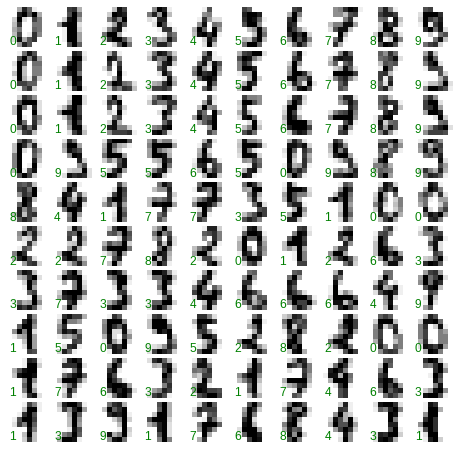

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
plt.show()

We need a two-dimensional, [n_samples, n_features] representation. We can accomplish this by treating each pixel in the image as a feature. 

Additionally, we need the target array.

In [17]:
X = digits.data
X.shape

(1797, 64)

In [18]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space.

Instead we'll reduce the dimensions to 2, using an unsupervised method:

In [19]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

Let's plot this data to see if we can learn anything from its structure:

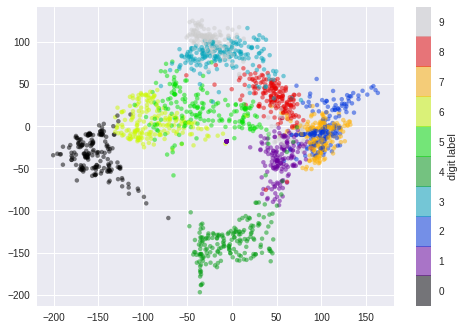

In [36]:
import seaborn as sns

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, s=20,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

### Classification on digits

Let's apply a classification algorithm to the digits.
First, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [39]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [42]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1347, 64), (450, 64), (1347,), (450,))

In [43]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

With even this extremely simple model, we find about 80% accuracy for classification of the digits!

However, this single number doesn't tell us *where* we've gone wrong—one nice way to do this is to use the *confusion matrix*:

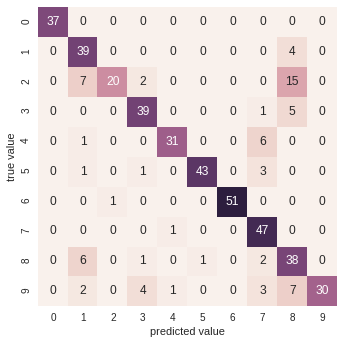

In [48]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We'll use green for correct labels, and red for incorrect labels:

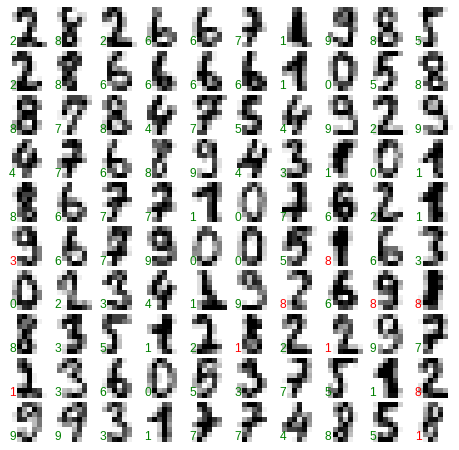

In [51]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')
plt.show()